In [26]:
# (name: (area, value))
stuffdict = {'couch_s':(300,75), 
             'couch_b':(500,80), 
             'bed':(400,100), 
             'closet':(200,50), 
             'bed_s':(200,40), 
             'desk':(200,70), 
             'table':(300,80),
             'tv_table':(200,30),
             'armchair':(100,30),
             'bookshelf':(200,60), 
             'cabinet':(150,20),
             'game_table':(150,30),
             'hammock':(250,45),
             'diner_table_with_chairs':(250,70),
             'stools':(150,30),
             'mirror':(100,20),
             'instrument':(300,70),
             'plant_1':(25,10),
             'plant_2':(30,20),
             'plant_3':(45,25),
             'sideboard':(175,30),
             'chest_of_drawers':(25,40),
             'guest_bed':(250,40),
             'standing_lamp':(20,30), 
             'garbage_can':(30,35), 
             'bar_with_stools':(200,40), 
             'bike_stand':(100,80),
             'chest':(150,25),
             'heater':(100,25)
            }


print(f'Items: {stuffdict}')

Items: {'couch_s': (300, 75), 'couch_b': (500, 80), 'bed': (400, 100), 'closet': (200, 50), 'bed_s': (200, 40), 'desk': (200, 70), 'table': (300, 80), 'tv_table': (200, 30), 'armchair': (100, 30), 'bookshelf': (200, 60), 'cabinet': (150, 20), 'game_table': (150, 30), 'hammock': (250, 45), 'diner_table_with_chairs': (250, 70), 'stools': (150, 30), 'mirror': (100, 20), 'instrument': (300, 70), 'plant_1': (25, 10), 'plant_2': (30, 20), 'plant_3': (45, 25), 'sideboard': (175, 30), 'chest_of_drawers': (25, 40), 'guest_bed': (250, 40), 'standing_lamp': (20, 30), 'garbage_can': (30, 35), 'bar_with_stools': (200, 40), 'bike_stand': (100, 80), 'chest': (150, 25), 'heater': (100, 25)}


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_area_and_value(stuffdict):
    area = []
    value = []
    
    for item in stuffdict:
        area.append(stuffdict[item][0])
        value.append(stuffdict[item][1])
        
    return area, value

def get_memtable(area, value, A=2000, n=len(stuffdict)):
    T = [[0 for w in range(A+1)]
        for i in range(n+1)]
    for i in range(n+1):
        for w in range(A+1):
            if i == 0 or w == 0:
                T[i][w] = 0
            elif area[i-1] <= w:
                T[i][w] = max(value[i-1] + T[i-1][w-area[i-1]], T[i-1][w])
            else:
                T[i][w] = T[i-1][w]       
    return T

def plot_memtable(T, stuffdict):
    plt.figure(figsize=(30,15))
    item_list = list(stuffdict.keys())
    item_list.insert(0, 'empty')
    sns.heatmap(T, yticklabels=item_list)
    plt.yticks(size=25)
    plt.xlabel('Area', size=25)
    plt.ylabel('Added item', size=25)
    plt.title('Value for Area with Set of Items', size=30)
    plt.show()
    
def get_selected_items_list(T):
    res = T[n][A]
    w = A
    totarea = 0
    items_list = []
    
    for i in range(n, 0, -1):
        if res <= 0:
            break
        if res == T[i-1][w]:
            continue
        else:
            items_list.append((area[i-1], value[i-1]))
            totarea += area[i-1]
            res -= value[i-1]
            w -= area[i-1]
            
    return res, totarea, items_list



Total area of items:  5100
Total value of items: 1300
Total area available: 2000
Total # of items:     29


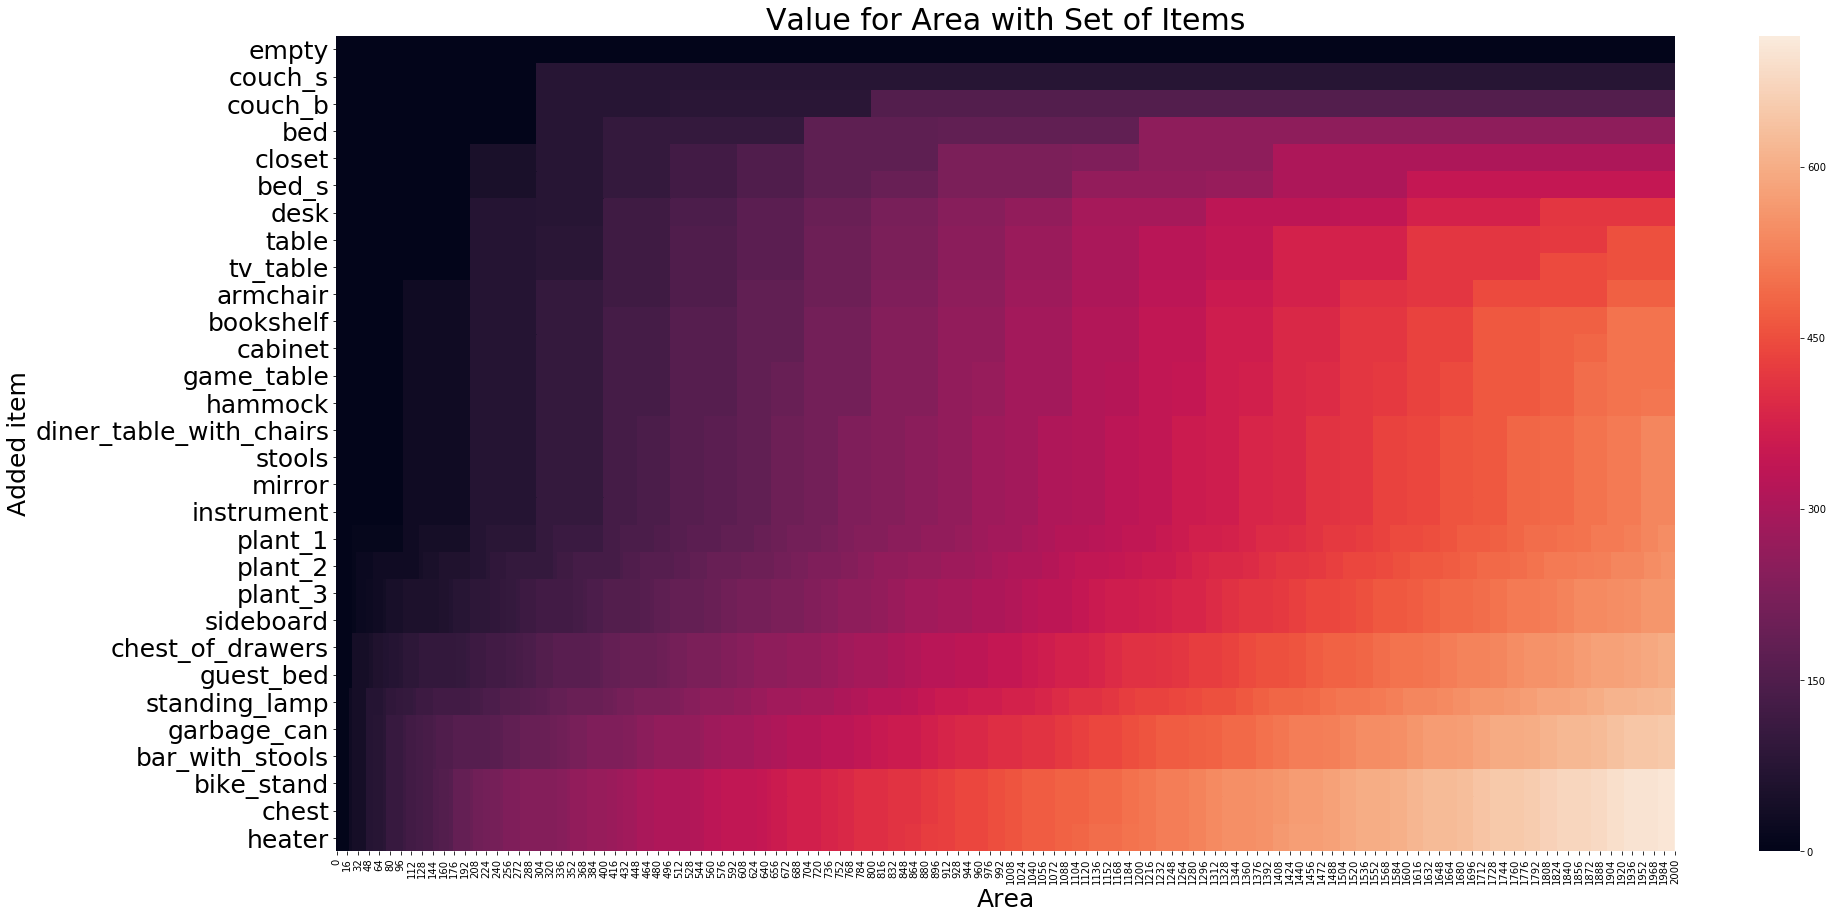

In [28]:
area, value = get_area_and_value(stuffdict)

print('\n')
print(f'Total area of items:  {sum(area)}')
print(f'Total value of items: {sum(value)}')

A = 2000
n = len(stuffdict)

print(f'Total area available: {A}')
print(f'Total # of items:     {n}')

T = get_memtable(area, value)

plot_memtable(T, stuffdict)

res, totarea, items_list = get_selected_items_list(T)

In [34]:
[print(*line) for line in T]

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 7

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 110 110 110 110 110 110 1

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 10 10 10 10 10 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 40 40 40 40 40 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 80 80 80 80 80 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 10 10 10 10 10 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 25 25 25 25 25 25 25 25 25 25 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 35 35 35 35 35 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 65 65 65 65 65 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 95 95 95 95 95 95 95 95 95 95 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 105 105 105 105 105 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 10 10 10 10 10 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 25 25 25 25 25 25 25 25 25 25 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 35 35 35 35 35 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 65 65 65 65 65 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 95 95 95 95 95 95 95 95 95 95 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 105 105 105 105 105 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 50 50 50 50 50 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 65 65 65 65 65 65 65 65 65 65 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 75 75 75 75 75 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 105 105 105 105 105 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 135 135 135 135 135 135 135 135 135 135 140 140 140 140 140 140 140 140 140 140 140 140 140 140 140 145 145 145 145 145 155 1

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 50 50 50 50 50 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 65 65 65 65 65 65 65 65 65 65 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 75 75 75 75 75 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 85 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 95 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 105 105 105 105 105 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 135 135 135 135 135 135 135 135 135 135 140 140 140 140 140 140 140 140 140 140 140 140 140 140 140 145 145 145 145 145 155 1

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 30 30 30 30 30 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 80 80 80 80 80 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 95 95 95 95 95 95 95 95 95 95 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 105 105 105 105 105 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 115 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 135 135 135 135 135 145 145 145 145 145 145 145 145 145 145 145 145 145 145 145 145 145 145 145 145 145 145 145 145 145 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 160 160 160 160 160 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 30 30 30 30 30 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 70 70 70 70 70 70 70 70 70 70 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 80 80 80 80 80 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 115 115 115 115 115 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 130 130 130 130 130 130 130 130 130 130 135 135 135 135 135 135 135 135 135 135 135 135 135 135 135 140 140 140 140 140 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 165 165 165 165 165 165 165 165 165 165 165 165 165 165 165 170 170 170 170 170 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 30 30 30 30 30 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 70 70 70 70 70 70 70 70 70 70 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 80 80 80 80 80 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 115 115 115 115 115 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 130 130 130 130 130 130 130 130 130 130 135 135 135 135 135 135 135 135 135 135 135 135 135 135 135 140 140 140 140 140 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 165 165 165 165 165 165 165 165 165 165 165 165 165 165 165 170 170 170 170 170 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 30 30 30 30 30 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 70 70 70 70 70 70 70 70 70 70 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 80 80 80 80 80 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 115 115 115 115 115 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 130 130 130 130 130 130 130 130 130 130 135 135 135 135 135 135 135 135 135 135 135 135 135 135 135 150 150 150 150 150 150 150 150 150 150 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 160 160 160 160 160 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 195 195 195 195 195 205 205 205 205 205 205 205 205 205 205 205 205 205 205 205 210 210 210 210 210 210 210 210 210 210 215 215 215 215 215 215 215 215 215 215 215 215 215 215 215 220 220 220 220 220 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 30 30 30 30 30 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 70 70 70 70 70 70 70 70 70 70 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 80 80 80 80 80 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 115 115 115 115 115 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 130 130 130 130 130 130 130 130 130 130 135 135 135 135 135 135 135 135 135 135 135 135 135 135 135 150 150 150 150 150 150 150 150 150 150 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 160 160 160 160 160 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 195 195 195 195 195 205 205 205 205 205 205 205 205 205 205 205 205 205 205 205 210 210 210 210 210 210 210 210 210 210 215 215 215 215 215 215 215 215 215 215 215 215 215 215 215 220 220 220 220 220 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 30 30 30 30 30 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 40 70 70 70 70 70 70 70 70 70 70 75 75 75 75 75 75 75 75 75 75 75 75 75 75 75 80 80 80 80 80 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 105 115 115 115 115 115 125 125 125 125 125 125 125 125 125 125 125 125 125 125 125 130 130 130 130 130 130 130 130 130 130 135 135 135 135 135 135 135 135 135 135 135 135 135 135 135 150 150 150 150 150 150 150 150 150 150 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 160 160 160 160 160 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 185 195 195 195 195 195 205 205 205 205 205 205 205 205 205 205 205 205 205 205 205 210 210 210 210 210 210 210 210 210 210 215 215 215 215 215 215 215 215 215 215 215 215 215 215 215 220 220 220 220 220 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [29]:
selected_stuff = []

for search in items_list:
    for key, value in stuffdict.items():
        if value == search:
            selected_stuff.append(key)

In [30]:
print(selected_stuff)

['bike_stand', 'garbage_can', 'standing_lamp', 'chest_of_drawers', 'plant_3', 'plant_2', 'diner_table_with_chairs', 'bookshelf', 'armchair', 'table', 'desk', 'bed', 'couch_s']


In [31]:
2**29

536870912